In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
moex = pd.read_csv('МосБиржа_1day_09042022_09042023.txt',sep=';')

In [10]:
moex = pd.read_csv('МосБиржа_1day_09042022_09042023.txt',sep=';')\
    .rename(columns={'<DATE>':'DATE','<OPEN>':'OPEN','<LOW>':'LOW','<CLOSE>':'CLOSE','<VOL>':'VOL','<HIGH>':'HIGH'})\
    .drop(['<PER>','<TIME>','<OPENINT>','<TICKER>'],1)
moex.DATE = pd.to_datetime(moex.DATE,format="%Y%m%d")

/tmp/ipykernel_11461/3166719207.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  .drop(['<PER>','<TIME>','<OPENINT>','<TICKER>'],1)


СОЗДАЕМ КОЛОНКИ ДОХОДНОСТЕЙ. ОДНУ ЧЕРЕЗ РАЗНОСТЬ ВТОРУЮ ЧЕРЕЗ ЛОГАРИФМ ОТНОШЕНИЯ

In [3]:
moex['earn_ln']=np.log(moex.CLOSE/moex.CLOSE.shift(1).fillna(0))
moex.replace([np.inf, -np.inf], 0, inplace=True)
moex['earn_dif']=moex.CLOSE-moex.CLOSE.shift(1).fillna(0)
moex['earn_dif'][0]=0

C:\Users\zlc28\AppData\Local\Temp\ipykernel_12244\4057505416.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moex['earn_dif'][0]=0


СОЗДАЕМ ЗАГОТОВКИ ДАТАФРЕЙМОВ ДЛЯ АНАЛИЗА . 

In [4]:
moex_open_df = moex[['DATE','OPEN']].set_index('DATE')
moex_close_df = moex[['DATE','CLOSE']].set_index('DATE')
moex_earn_dif_df = moex[['DATE','earn_dif']].set_index('DATE')
moex_earn_ln_df = moex[['DATE','earn_ln']].set_index('DATE')
#=============================================================
moex_open_df_3m=moex_open_df['2023-01-09':'2023-04-09']
moex_close_df_3m=moex_close_df['2023-01-09':'2023-04-09']
moex_earn_dif_df_3m = moex_earn_dif_df['2023-01-09':'2023-04-09']
moex_earn_ln_df_3m = moex_earn_ln_df['2023-01-09':'2023-04-09']

In [5]:
moex.head()

,DATE,OPEN,HIGH,LOW,CLOSE,VOL,earn_ln,earn_dif
0,2022-04-11,102.74,103.70,100.70,100.77,1407440,0.000000,0.00
1,2022-04-12,101.10,101.48,96.50,99.50,2422290,-0.012683,-1.27
2,2022-04-13,100.00,100.88,98.20,99.32,1289640,-0.001811,-0.18
3,2022-04-14,99.85,99.85,93.50,93.50,2003520,-0.060386,-5.82
4,2022-04-15,93.50,94.43,90.12,93.65,3415500,0.001603,0.15


[Text(0.5, 1.0, 'Доходности ммвб за год ln(/)'),
 Text(0.5, 0, 'Дата'),
 Text(0, 0.5, 'Значение')]

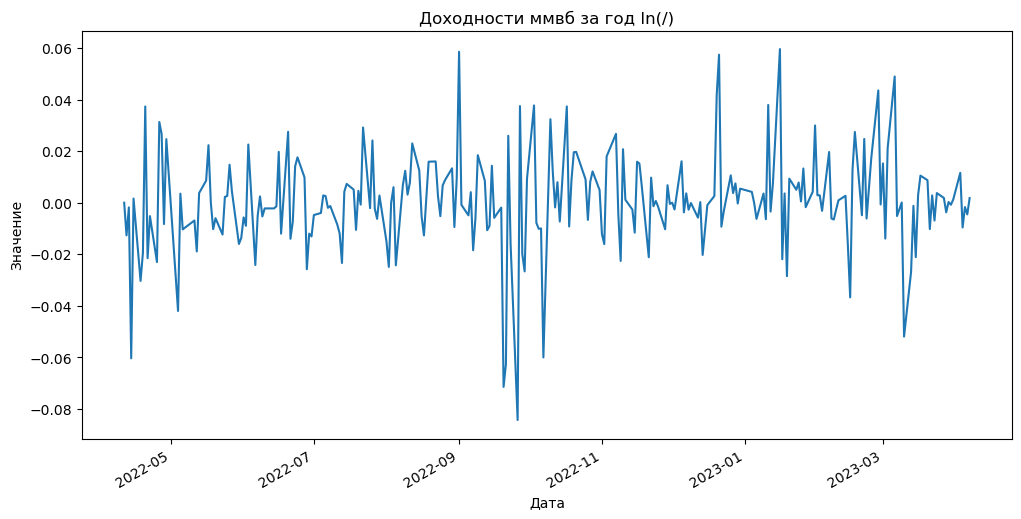

In [6]:
ax = moex_earn_ln_df.plot(figsize=(12,6),legend=None)
ax.set(title='Доходности ммвб за год ln(/)' , xlabel='Дата' , ylabel='Значение')

array([[<Axes: title={'center': 'earn_ln'}>]], dtype=object)

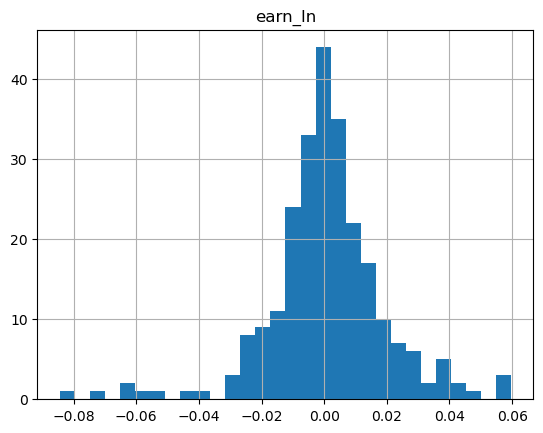

In [7]:
moex_earn_ln_df.hist(bins=30)

In [8]:
print('Среднее = {} \nДисперсия = {} \nCТД.Отклонение = {}\nМедиана = {}'.format(round(moex_earn_ln_df.mean()[0],5)\
                                                                                 , round(np.var(moex_earn_ln_df)[0],5)\
                                                                                 , round(np.std(moex_earn_ln_df)[0],5)\
                                                                                 , np.median(moex_earn_ln_df)))

Среднее = 0.00043 
Дисперсия = 0.00036 
CТД.Отклонение = 0.01893
Медиана = 0.0


ОЦЕНКА SHARPE RATIO НА ИСТОРИЧЕСКИХ ДАННЫХ ЧЕРЕЗ ЛОГАРИФМ ОТНОШЕНИЯ : LN(CLOSE[t]/CLOSE[t-1])



In [9]:
mean_profit_ln = round(moex_earn_ln_df.mean()[0],5)
var_profit_ln = round(np.var(moex_earn_ln_df)[0],5)
std_profit_ln = round(np.std(moex_earn_ln_df)[0],5)
median_profit_ln = np.median(moex_earn_ln_df)

In [10]:
sinma_3_high = round(mean_profit_ln+3*std_profit_ln,5)
sinma_3_low = round(mean_profit_ln-3*std_profit_ln,5)
print('По закону 3х сигм 99.9% наблюдений лежит в рамках  [ {} ; {} ] при нормальном распределении'.format(sinma_3_low,sinma_3_high))

По закону 3х сигм 99.9% наблюдений лежит в рамках  [ -0.05636 ; 0.05722 ] при нормальном распределении


In [11]:
non_risk_rate_per_day_ln = (1+0.007)**(1/250)-1

In [12]:
risk_premium_ln = mean_profit_ln-non_risk_rate_per_day_ln

In [13]:
SHARPE_RATIO_LN = risk_premium_ln/std_profit_ln

In [14]:
SHARPE_RATIO_LN

0.021241265492724995

ОЦЕНКА SHARPE RATIO НА ИСТОРИЧЕСКИХ ДАННЫХ ЧЕРЕЗ РАЗНОСТЬ ЗАКРЫТИЙ : CLOSE[t]-CLOSE[t-1]

In [15]:
mean_profit_dif = round(moex_earn_dif_df.mean()[0],5)
var_profit_dif = round(np.var(moex_earn_dif_df)[0],5)
std_profit_dif = round(np.std(moex_earn_dif_df)[0],5)
median_profit_dif = np.median(moex_earn_dif_df)

In [16]:
sinma_3_high_dif = round(mean_profit_dif+3*std_profit_dif,5)
sinma_3_low_dif = round(mean_profit_dif-3*std_profit_dif,5)
print('По закону 3х сигм 99.9% наблюдений лежит в рамках  [ {} ; {} ] при нормальном распределении'.format(sinma_3_low_dif,sinma_3_high_dif))

По закону 3х сигм 99.9% наблюдений лежит в рамках  [ -5.22029 ; 5.31229 ] при нормальном распределении


In [17]:
non_risk_rate_per_day_dif = (1+0.007)**(1/250)-1

In [18]:
risk_premium_dif = mean_profit_dif-non_risk_rate_per_day_dif

In [19]:
risk_premium_dif

0.04597209715577728

In [20]:
std_profit_dif

1.75543

In [21]:
SHARPE_RATIO_DIF = risk_premium_dif/std_profit_dif

In [22]:
SHARPE_RATIO_DIF

0.02618851059613729

SHARPE RATIO НА ИСТОРИЧЕСКИХ ДАННЫХ ЧЕРЕЗ РАЗНОСТЬ ЗАКРЫТИЙ ДЕЛЕННУЮ НА ЗАКРЫТИЕ ПРОШЛОГО ДНЯ :             
(CLOSE[t]-CLOSE[t-1])/CLOSE[t-1]

In [23]:
moex['earn_modified_dif'] = (moex.CLOSE-moex.CLOSE.shift(1).fillna(0))/moex.CLOSE.shift(1).fillna(0)

In [24]:
moex.replace([np.inf, -np.inf], 0, inplace=True)

In [25]:
moex_earn_modified_dif_df = moex[['DATE','earn_modified_dif']].set_index('DATE')

In [26]:
mean_profit_modified_dif = round(moex_earn_modified_dif_df.mean()[0],5)
var_profit_modified_dif = round(np.var(moex_earn_modified_dif_df)[0],5)
std_profit_modified_dif = round(np.std(moex_earn_modified_dif_df)[0],5)
median_profit_modified_dif = np.median(moex_earn_modified_dif_df)

In [27]:
non_risk_rate_per_day = (1+0.007)**(1/250)-1

In [28]:
risk_premium_modified_dif = mean_profit_modified_dif-non_risk_rate_per_day

In [29]:
SHARPE_RATIO_MODIFIED_DIF = risk_premium_modified_dif/std_profit_modified_dif

In [30]:
SHARPE_RATIO_MODIFIED_DIF

0.030847756003035725

А.В. ПРЕДЛОЖИЛ ПЕРЕВЕСТИ ЭТО ВСЁ В ГОДОВОЙ ЭКВИВАЛЕНТ(СМ В ТЕЛЕГЕ)

In [31]:
moex_earn_modified_dif_df

,earn_modified_dif
DATE,
2022-04-11,0.000000
2022-04-12,-0.012603
2022-04-13,-0.001809
2022-04-14,-0.058598
2022-04-15,0.001604
...,...
2023-04-03,0.011639
2023-04-04,-0.009573
2023-04-05,-0.001685


(array([ 1.,  1.,  1.,  2.,  1.,  1.,  1.,  7., 13., 26., 46., 66., 30.,
        22., 12.,  9.,  5.,  2.,  1.,  3.]),
 array([-0.08086479, -0.07375022, -0.06663565, -0.05952109, -0.05240652,
        -0.04529195, -0.03817739, -0.03106282, -0.02394825, -0.01683369,
        -0.00971912, -0.00260455,  0.00451002,  0.01162458,  0.01873915,
         0.02585372,  0.03296828,  0.04008285,  0.04719742,  0.05431198,
         0.06142655]),
 <BarContainer object of 20 artists>)

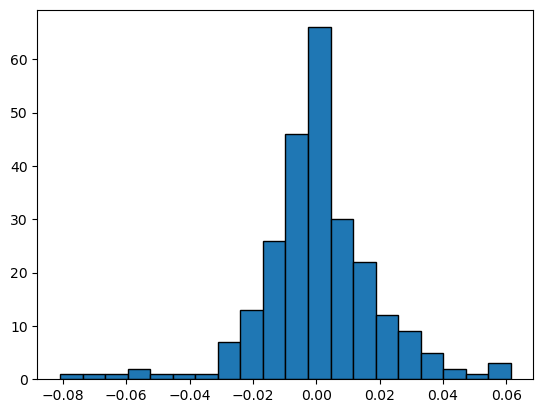

In [32]:
plt.hist (moex_earn_modified_dif_df, edgecolor='black', bins=20) 

 ПРОВЕРКА РЯДОВ НА СТАЦИОНАРНОСТЬ ТЕСТОМ ДИКИ ФУЛЛЕРА :
 H0 - нестационарен v.s. H1 - стационарен

In [33]:
from statsmodels.tsa.stattools import adfuller 

In [34]:
adf_test = adfuller(moex_earn_ln_df)
print('P_value = '+str(adf_test[1]))
print('Вывод: ряд стационарен')

P_value = 2.1568576110732684e-28
Вывод: ряд стационарен


<Axes: xlabel='DATE'>

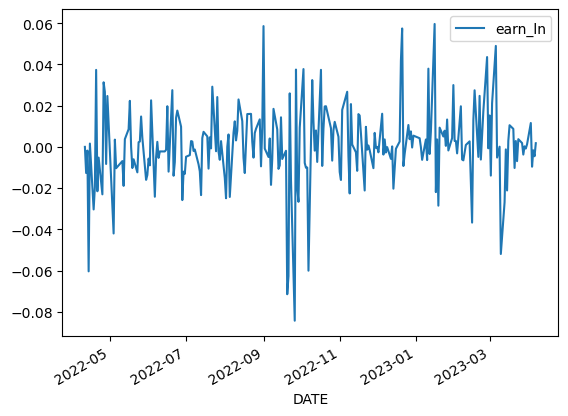

In [35]:
moex_earn_ln_df.plot()

In [36]:
adf_test = adfuller(moex_earn_dif_df)
print('P_value = '+str(adf_test[1]))
print('Вывод: ряд стационарен')

P_value = 4.785613509665484e-28
Вывод: ряд стационарен


<Axes: xlabel='DATE'>

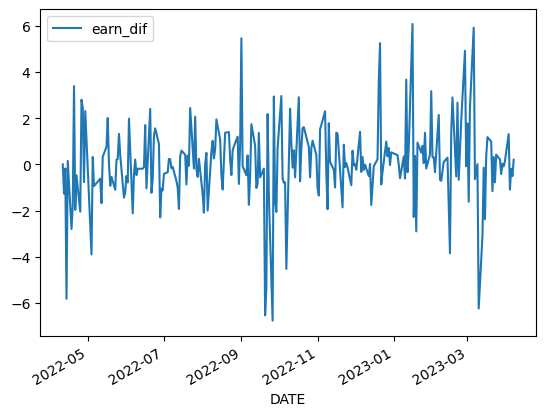

In [37]:
moex_earn_dif_df.plot()

In [38]:
adf_test = adfuller(moex_earn_modified_dif_df)
print('P_value = '+str(adf_test[1]))
print('Вывод: ряд стационарен')

P_value = 1.9733081347330767e-28
Вывод: ряд стационарен


<Axes: xlabel='DATE'>

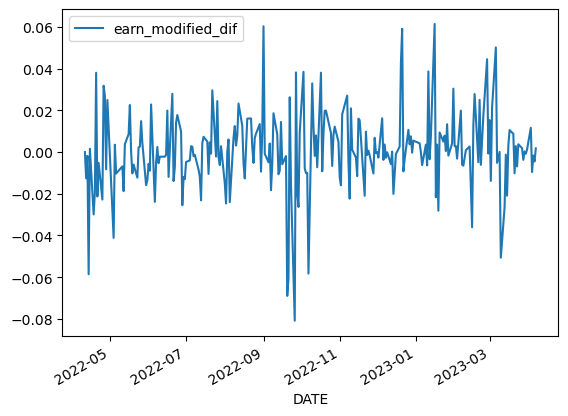

In [39]:
moex_earn_modified_dif_df.plot()

ПРОВЕРКА РЯДОВ НА ТРЕНД ТЕСТОМ МАННА_КАНДАЛЛА : H0 - тренда нет v.s. H1 - тренд есть 

In [36]:
import pymannkendall as mk

In [37]:
mk.original_test(moex_earn_ln_df)
print('P-value = {}'.format(mk.original_test(moex_earn_ln_df)[2]))
print('Вывод : тренда нет')

NameError: name 'moex_earn_ln_df' is not defined

In [ ]:
mk.original_test(moex_earn_dif_df)
print('P-value = {}'.format(mk.original_test(moex_earn_dif_df)[2]))
print('Вывод : тренда нет')

In [ ]:
mk.original_test(moex_earn_modified_dif_df)
print('P-value = {}'.format(mk.original_test(moex_earn_modified_dif_df)[2]))
print('Вывод : тренда нет')

ПРОВОДИМ ACF , СМОТРИМ АВТОКОРРЕЛЯЦИЮ

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
plot_acf(moex_earn_ln_df )
plt.show()

In [ ]:
plot_acf(moex_earn_dif_df)
plt.show()

In [ ]:
plot_acf(moex_earn_modified_dif_df)
plt.show()

ЭКСПОНЕНЦИАЛЬНОЕ СГЛАЖИВАНИЕ  С ИНДЕКСАМИ I И I-1


In [ ]:
alpha = 0.5
 
# первое значение совпадает со значением временного ряда
exp_smoothing = [moex_earn_dif_df.earn_dif[0]]
 
# в цикле for последовательно применяем формулу ко всем элементам ряда
for i in range(1, len(moex_earn_dif_df.earn_dif)):
    exp_smoothing.append(alpha * moex_earn_dif_df.earn_dif[i] + (1 - alpha) * exp_smoothing[i - 1])
 


In [ ]:
moex_earn_dif_df['exp_smth'] = exp_smoothing

In [ ]:
plt.plot(moex_earn_dif_df.earn_dif, label = 'Доходность', color = 'steelblue')
plt.plot(moex_earn_dif_df.exp_smth, label = 'Экспоненциальное сглаживание', color = 'orange')

In [ ]:
# для этого импортируем класс timedelta
from datetime import timedelta
 
# возьмём последний индекс (31 декабря 1959 года)
last_date = df2.iloc[[-1]].index
 
# # "прибавим" один день
last_date = last_date + timedelta(days = 1)
last_date
 
# добавим его в датафрейм
df2 = df2.append(pd.DataFrame(index = last_date))
 
# значения за этот день останутся пустыми
df2.tail()

In [ ]:
-1.27*0.5

По формуле где используется индекс i-1 везде

In [ ]:
alpha = 0.5
 
# первое значение совпадает со значением временного ряда
exp_smoothing = [moex_earn_dif_df.earn_dif[0]]
 
# в цикле for последовательно применяем формулу ко всем элементам ряда
for i in range(1, len(moex_earn_dif_df.earn_dif)):
    exp_smoothing.append(alpha * moex_earn_dif_df.earn_dif[i-1] + (1 - alpha) * exp_smoothing[i - 1])

In [ ]:
moex_earn_dif_df['exp_smth'] = exp_smoothing

In [ ]:
plt.plot(moex_earn_dif_df.earn_dif, label = 'Доходность', color = 'steelblue')
plt.plot(moex_earn_dif_df.exp_smth, label = 'Экспоненциальное сглаживание', color = 'orange')

ПОДБОР ПАРАМЕТРОВ ДЛЯ ARMA

In [55]:
import statsmodels.tsa.arima.model

In [56]:
res = statsmodels.tsa.stattools.arma_order_select_ic(moex_earn_dif_df.earn_dif, ic=["aic", "bic"], trend="n")

C:\Users\zlc28\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\zlc28\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [58]:
res.bic_min_order

(0, 0)

ARMA

In [54]:
from statsmodels.tsa.arima.model import ARIMA

In [42]:
model = ARIMA(moex_earn_dif_df.earn_dif, order=(1,0,0))

C:\Users\zlc28\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zlc28\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zlc28\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [43]:
model_fit = model.fit()

In [44]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               earn_dif   No. Observations:                  250
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -495.309
Date:                Fri, 14 Jul 2023   AIC                            996.618
Time:                        17:13:38   BIC                           1007.182
Sample:                             0   HQIC                          1000.870
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0460      0.115      0.400      0.689      -0.180       0.272
ar.L1          0.0289      0.052      0.553      0.580      -0.073       0.131
sigma2         3.0789      0.182     16.948      0.0

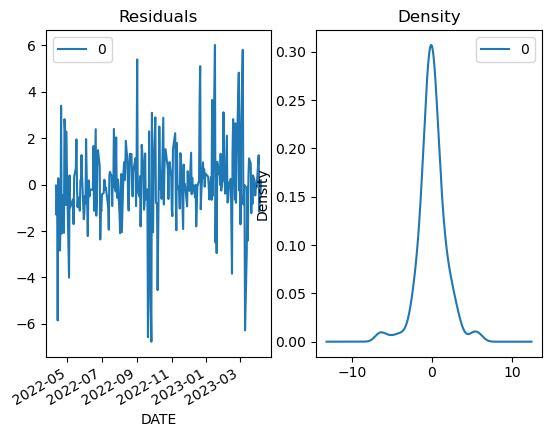

In [45]:
myresiduals = pd.DataFrame(model_fit.resid) 
fig, ax = plt.subplots(1,2) 
myresiduals.plot(title = "Residuals", ax = ax[0]) 
myresiduals.plot(kind = 'kde', title = 'Density', ax = ax[1]) 
plt.show() 


In [ ]:
model_fit.plot(dynamic = False) 
plt.show() 

In [50]:
model = ARIMA(moex_close_df.CLOSE, order=(1,1,1))

C:\Users\zlc28\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zlc28\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zlc28\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [51]:
model_fit = model.fit()

C:\Users\zlc28\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\zlc28\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [52]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  CLOSE   No. Observations:                  250
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -491.781
Date:                Fri, 14 Jul 2023   AIC                            989.562
Time:                        17:17:59   BIC                           1000.114
Sample:                             0   HQIC                           993.809
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8616      0.097     -8.918      0.000      -1.051      -0.672
ma.L1          0.9317      0.078     12.002      0.000       0.780       1.084
sigma2         3.0393      0.179     16.990      0.0

ПРОБУЕМ СЛОВИТЬ АВТОКОРРЕЛЯЦИЮ НА ДАННЫХ В 1 МЕСЯЦ 

In [13]:
moex_gap = pd.read_csv('МосБиржа_1month_18072020_18072023.txt',sep=';')\
    .rename(columns={'<DATE>':'DATE','<OPEN>':'OPEN','<LOW>':'LOW','<CLOSE>':'CLOSE','<VOL>':'VOL','<HIGH>':'HIGH'})\
    .drop(['<PER>','<TIME>','<OPENINT>','<TICKER>'],1)
moex_gap.DATE = pd.to_datetime(moex_gap.DATE,format="%Y%m%d")

/tmp/ipykernel_11461/1197966328.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  .drop(['<PER>','<TIME>','<OPENINT>','<TICKER>'],1)


In [30]:
moex_gap['earn_modified_dif'] = (moex_gap.CLOSE-moex_gap.CLOSE.shift(1).fillna(0))/moex_gap.CLOSE.shift(1).\
    fillna(0)
moex_gap.replace([np.inf, -np.inf], 0, inplace=True)

In [193]:
moex_gap.head()

,DATE,OPEN,HIGH,LOW,CLOSE,VOL,earn_modified_dif
0,2020-07-01,125.22,134.20,124.27,133.25,73671880,0.000000
1,2020-08-01,133.53,148.80,133.53,137.87,239863290,0.034672
2,2020-09-01,138.01,150.00,129.00,146.92,238407920,0.065642
3,2020-10-01,147.40,155.92,133.75,134.19,275922410,-0.086646
4,2020-11-01,133.90,154.87,131.02,152.88,347111660,0.139280


In [38]:
moex_gap_earn = moex_gap[['DATE','earn_modified_dif']].set_index('DATE')

<Axes: xlabel='DATE'>

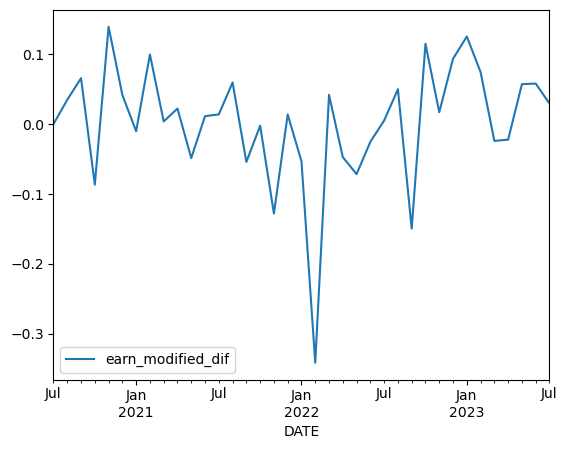

In [39]:
moex_gap_earn.plot()

In [40]:
from statsmodels.tsa.stattools import adfuller 
adf_test = adfuller(moex_gap_earn)
print('P_value = '+str(adf_test[1]))
print('Вывод: ряд стационарен')

P_value = 1.8786702298849854e-07
Вывод: ряд стационарен


In [42]:
import pymannkendall as mk
mk.original_test(moex_gap_earn)
print('P-value = {}'.format(mk.original_test(moex_gap_earn)[2]))
print('Вывод : тренда нет')

P-value = 0.6284436367082953
Вывод : тренда нет


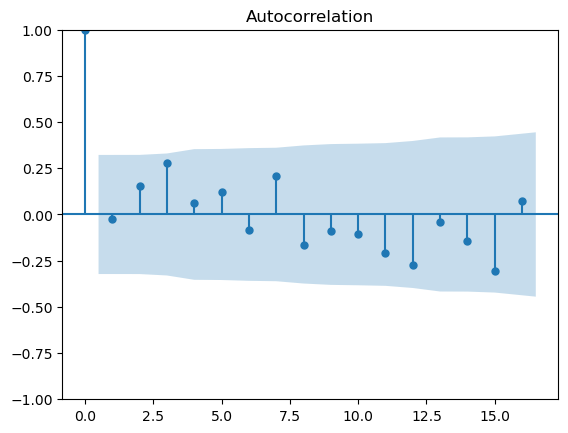

In [44]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(moex_gap_earn )
plt.show()

In [98]:
import statsmodels.tsa.arima.model

In [96]:
res = statsmodels.tsa.stattools.arma_order_select_ic(moex_gap_earn.earn_modified_dif, ic=["aic", "bic"], trend="n")

/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [94]:
res.aic_min_order

(0, 0)

In [95]:
res.bic_min_order

(0, 0)

In [99]:
from statsmodels.tsa.arima.model import ARIMA

In [108]:
model = ARIMA(moex_gap_earn.earn_modified_dif, order=(0,0,1))

/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [109]:
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:      earn_modified_dif   No. Observations:                   37
Model:                 ARIMA(0, 0, 1)   Log Likelihood                  38.109
Date:                Tue, 18 Jul 2023   AIC                            -70.217
Time:                        20:17:30   BIC                            -65.384
Sample:                    07-01-2020   HQIC                           -68.513
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.018      0.156      0.876      -0.033       0.038
ma.L1         -0.0192      0.233     -0.082      0.934      -0.476       0.438
sigma2         0.0075      0.001      5.742      0.0

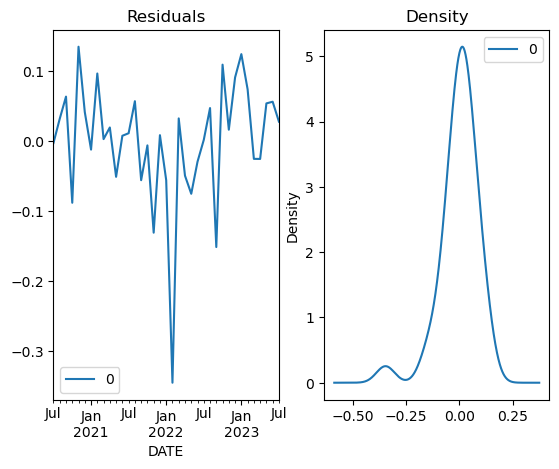

In [110]:
myresiduals = pd.DataFrame(model_fit.resid) 
fig, ax = plt.subplots(1,2) 
myresiduals.plot(title = "Residuals", ax = ax[0]) 
myresiduals.plot(kind = 'kde', title = 'Density', ax = ax[1]) 
plt.show() 

ПРОБУЕМ СЛОВИТЬ АВТОКОРРЕЛЯЦИЮ НА ДАННЫХ ЗА 3 МЕСЯЦА 

In [240]:
moex_3m = pd.read_csv('МосБиржа_3month_18072018_18072023.txt',sep=';')\
    .rename(columns={'<DATE>':'DATE','<OPEN>':'OPEN','<LOW>':'LOW','<CLOSE>':'CLOSE','<VOL>':'VOL','<HIGH>':'HIGH'})\
    .drop(['<PER>','<TIME>','<OPENINT>','<TICKER>'],1)
moex_3m.DATE = pd.to_datetime(moex_3m.DATE,format="%Y%m%d")

/tmp/ipykernel_11461/692655286.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  .drop(['<PER>','<TIME>','<OPENINT>','<TICKER>'],1)


In [241]:
moex_3m_new = moex_3m.loc[moex_3m.index%3==0]

In [242]:
moex_3m_new['earn_modified_dif'] = (moex_3m_new.CLOSE-moex_3m_new.CLOSE.shift(1).fillna(0))/moex_3m_new.CLOSE.shift(1).\
    fillna(0)
moex_3m_new.replace([np.inf, -np.inf], 0, inplace=True)

/tmp/ipykernel_11461/1144731805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moex_3m_new['earn_modified_dif'] = (moex_3m_new.CLOSE-moex_3m_new.CLOSE.shift(1).fillna(0))/moex_3m_new.CLOSE.shift(1).\
/tmp/ipykernel_11461/1144731805.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moex_3m_new.replace([np.inf, -np.inf], 0, inplace=True)


In [188]:
moex_3m_new_earn = moex_3m_new[['DATE','earn_modified_dif']].set_index('DATE')

<Axes: xlabel='DATE'>

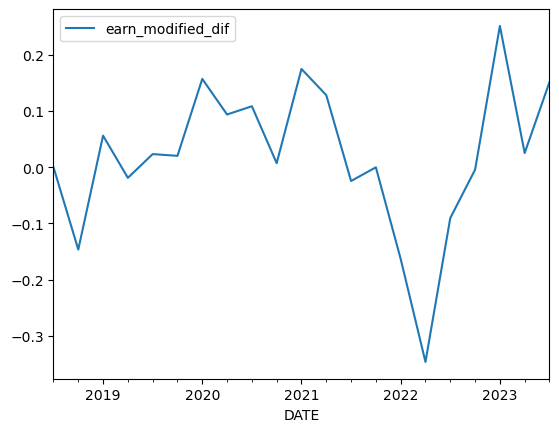

In [195]:
moex_3m_new_earn.plot()

In [202]:
from statsmodels.tsa.stattools import adfuller 
adf_test = adfuller(moex_3m_new_earn)
print('P_value = '+str(adf_test[1]))
print('Вывод: ряд не стационарен')

P_value = 0.07305044420572207
Вывод: ряд не стационарен


In [201]:
import pymannkendall as mk
mk.original_test(moex_3m_new_earn)
print('P-value = {}'.format(mk.original_test(moex_3m_new_earn)[2]))
print('Вывод : тренда нет')

P-value = 0.7857971061789661
Вывод : тренда нет


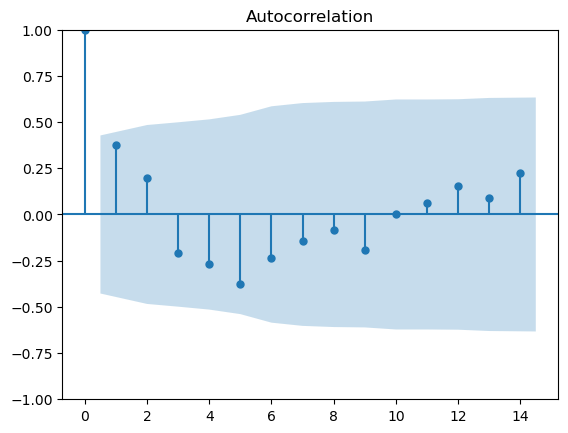

In [203]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(moex_3m_new_earn )
plt.show()

In [204]:
import statsmodels.tsa.arima.model

In [208]:
res = statsmodels.tsa.stattools.arma_order_select_ic(moex_3m_new_earn, ic=["aic", "bic"], trend="n")

/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/daniil/anaconda3/lib/py

In [211]:
res.bic_min_order

(1, 0)

In [210]:
res.aic_min_order

(1, 0)

In [239]:
moex_3m

,DATE,OPEN,HIGH,LOW,CLOSE,VOL
0,2016-07-01,119.31,120.09,112.34,113.51,49567470
1,2016-08-01,113.54,132.40,110.60,127.07,123981830
2,2016-09-01,127.05,131.50,120.82,126.60,105147250
3,2016-10-01,127.29,128.98,111.75,116.71,126205850
4,2016-11-01,117.30,119.67,108.24,118.35,213609230
...,...,...,...,...,...,...
80,2023-03-01,115.49,124.92,109.34,112.55,239157300
81,2023-04-01,112.86,114.95,108.00,110.04,94999880
82,2023-05-01,109.88,117.19,106.21,116.32,96638570
83,2023-06-01,116.76,128.65,115.02,123.06,140448330


ПРОБУЕМ СЛОВИТЬ АВТКОРРЕЛЯЦИЮ НА ДАННЫХ РАЗ В 3 МЕСЯЦА С 16ГОД 7 МЕСЯЦ ПО 23ГОД 7 МЕСЯЦ

In [220]:
moex_3m = pd.read_csv('МосБиржа_3month_18072016_18072023.txt',sep=';')\
    .rename(columns={'<DATE>':'DATE','<OPEN>':'OPEN','<LOW>':'LOW','<CLOSE>':'CLOSE','<VOL>':'VOL','<HIGH>':'HIGH'})\
    .drop(['<PER>','<TIME>','<OPENINT>','<TICKER>'],1)
moex_3m.DATE = pd.to_datetime(moex_3m.DATE,format="%Y%m%d")


moex_3m_new = moex_3m.loc[moex_3m.index%3==0]



moex_3m_new['earn_modified_dif'] = (moex_3m_new.CLOSE-moex_3m_new.CLOSE.shift(1).fillna(0))/moex_3m_new.CLOSE.shift(1).\
    fillna(0)
moex_3m_new.replace([np.inf, -np.inf], 0, inplace=True)


moex_3m_new_earn = moex_3m_new[['DATE','earn_modified_dif']].set_index('DATE')

/tmp/ipykernel_11461/576100142.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  .drop(['<PER>','<TIME>','<OPENINT>','<TICKER>'],1)
/tmp/ipykernel_11461/576100142.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moex_3m_new['earn_modified_dif'] = (moex_3m_new.CLOSE-moex_3m_new.CLOSE.shift(1).fillna(0))/moex_3m_new.CLOSE.shift(1).\
/tmp/ipykernel_11461/576100142.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moex_3m_new.replace([np.inf, -np.inf], 0, inplace=True)


In [238]:
moex_3m_new_earn.head()

,earn_modified_dif
DATE,
2016-07-01,0.000000
2016-10-01,0.028191
2017-01-01,0.149859
2017-04-01,-0.142697
2017-07-01,-0.069535


<Axes: xlabel='DATE'>

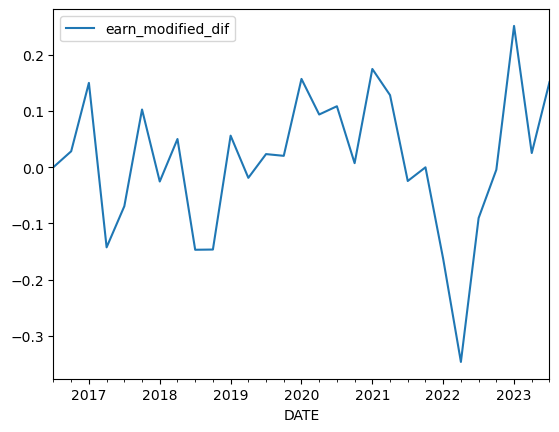

In [222]:
moex_3m_new_earn.plot()

In [236]:
#ПРОВЕРКА НА СТАЦИОНАРНОСТЬ ДИКИ-ФУЛЛЕРОМ
from statsmodels.tsa.stattools import adfuller 
adf_test = adfuller(moex_3m_new_earn)
print('P_value = '+str(adf_test[1]))
print('Вывод: ряд стационарен')
print('\n\n')
#ПРОВЕРКА НА ПРИСУТСТВИЕ ТРЕНДА ТЕСТОМ МАННА-КЕНДАЛЛА
import pymannkendall as mk
mk.original_test(moex_3m_new_earn)
print('P-value = {}'.format(mk.original_test(moex_3m_new_earn)[2]))
print('Вывод : тренда нет')

P_value = 0.005766354329592572
Вывод: ряд стационарен



P-value = 0.5864526254323217
Вывод : тренда нет


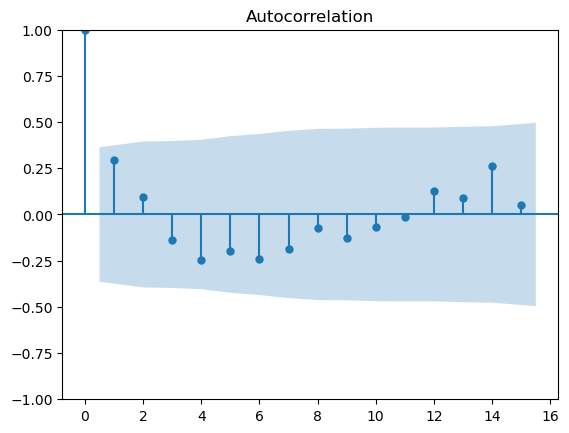

In [226]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(moex_3m_new_earn )
plt.show()

In [231]:
res = statsmodels.tsa.stattools.arma_order_select_ic(moex_3m_new_earn, ic=["aic", "bic"], trend="n")


res.bic_min_order

/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 0)

In [22]:
import pandas as pd
import numpy as np

In [2]:
mmx = pd.read_csv('МосБиржа_3month_18072016_18072023.txt',sep=';')

In [79]:
mmx = pd.read_csv('МосБиржа_13years_1month_18072010_18072023.txt',sep=';')\
    .rename(columns={'<DATE>':'DATE','<OPEN>':'OPEN','<LOW>':'LOW','<CLOSE>':'CLOSE','<VOL>':'VOL','<HIGH>':'HIGH'})\
    .drop(['<PER>','<TIME>','<OPENINT>','<TICKER>'],1)
mmx.DATE = pd.to_datetime(mmx.DATE,format="%Y%m%d")

/tmp/ipykernel_7417/3761826551.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  .drop(['<PER>','<TIME>','<OPENINT>','<TICKER>'],1)


In [63]:
mmx['earn_modified_dif'] = (mmx.CLOSE-mmx.CLOSE.shift(1).fillna(0))/mmx.CLOSE.shift(1).\
    fillna(0)
mmx.replace([np.inf, -np.inf], 0, inplace=True)

mmx_time_series = mmx[['DATE','earn_modified_dif']].set_index('DATE')
mmx_time_series_2 = mmx[['DATE','CLOSE']].set_index('DATE')

СЕЗОННАЯ ДЕКОМПОЗИЦИЯ

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 8,9

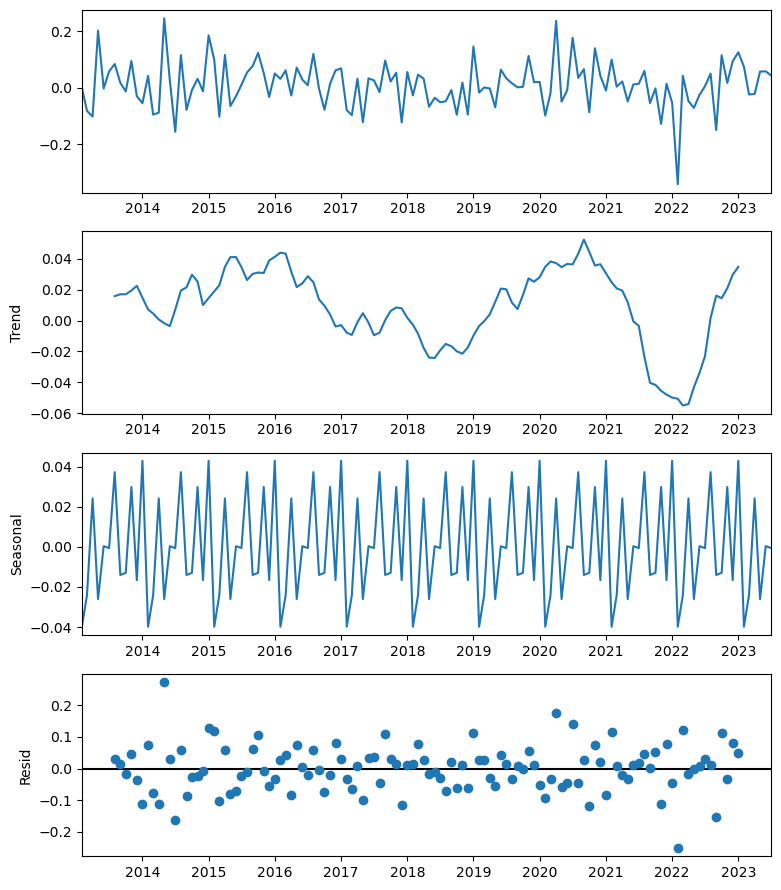

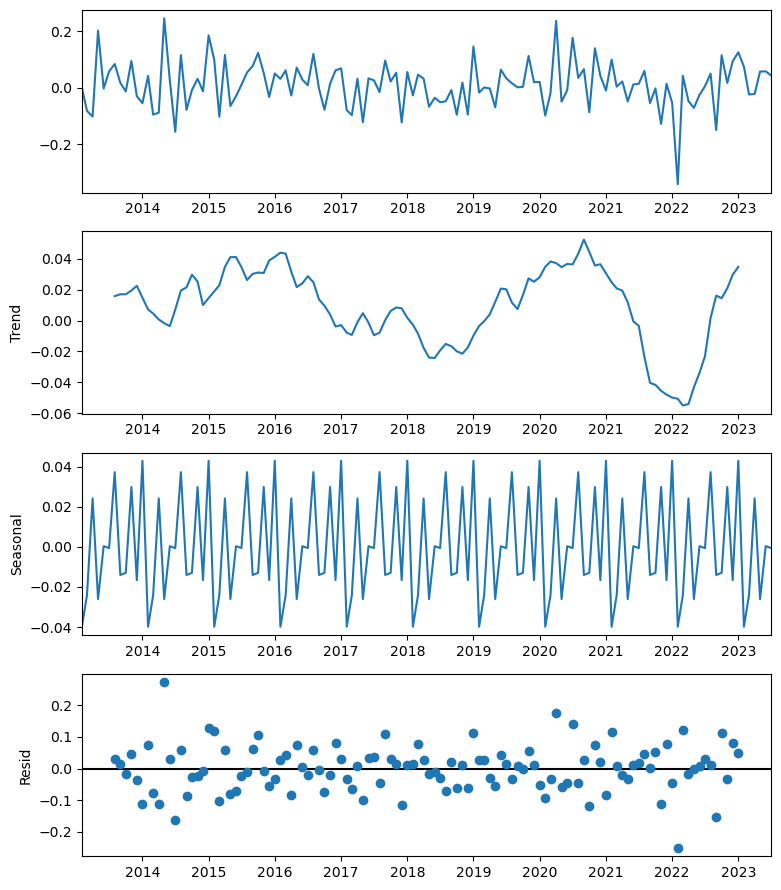

In [65]:
#Сезонная декомпозиция ряда доходностей
decompose = seasonal_decompose(mmx_time_series)
decompose.plot()

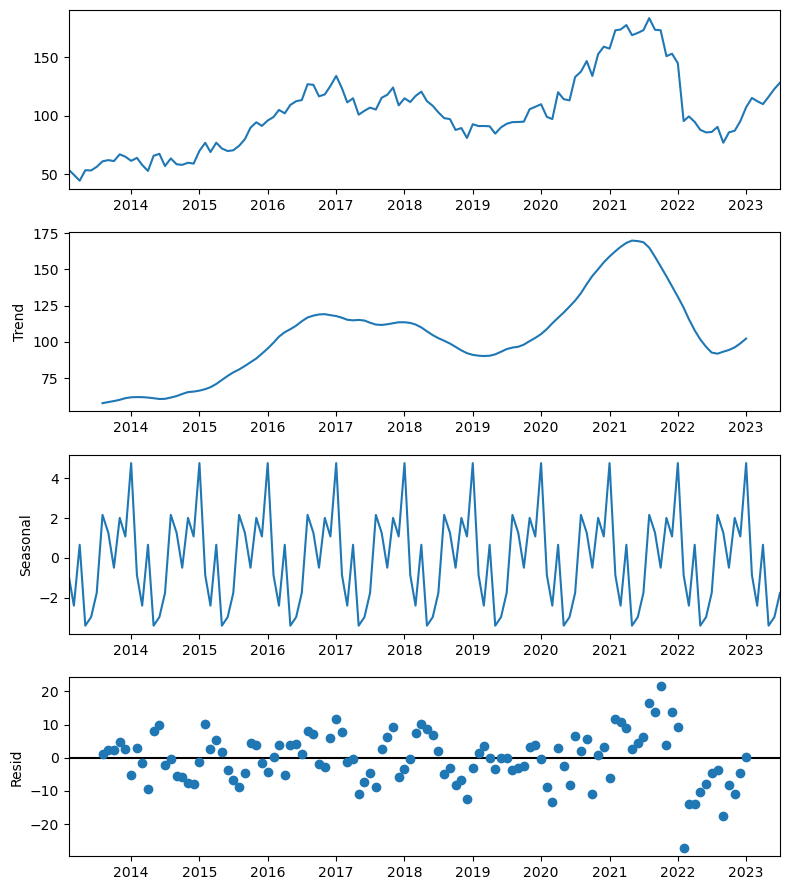

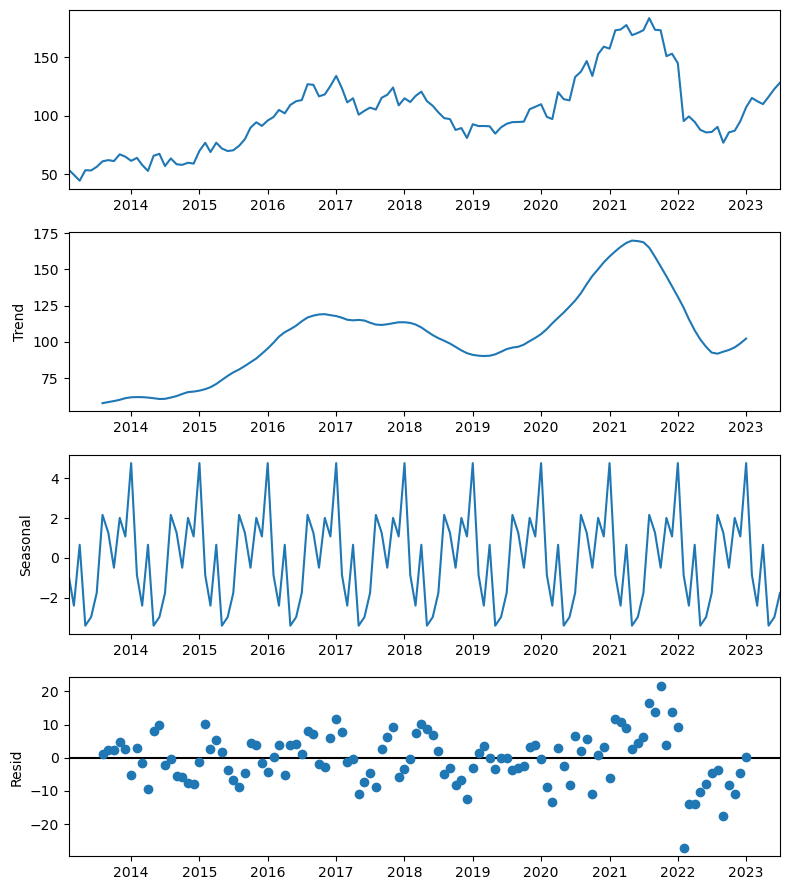

In [42]:
#Сезонная декомпозиция исходного ряда 
decompose = seasonal_decompose(mmx_time_series_2)
decompose.plot()

In [85]:
df = mmx_time_series_2

In [86]:
series = df['CLOSE']

<Axes: xlabel='DATE'>

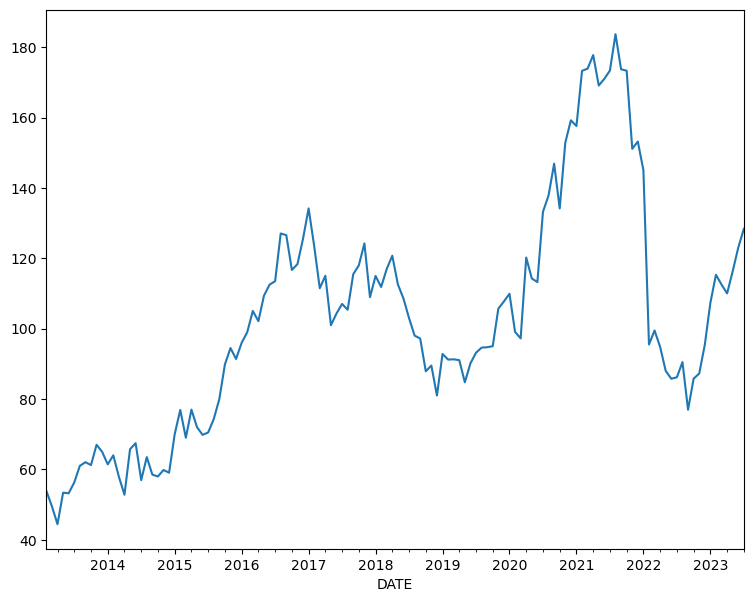

In [97]:
series.plot()

In [96]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [9, 7]

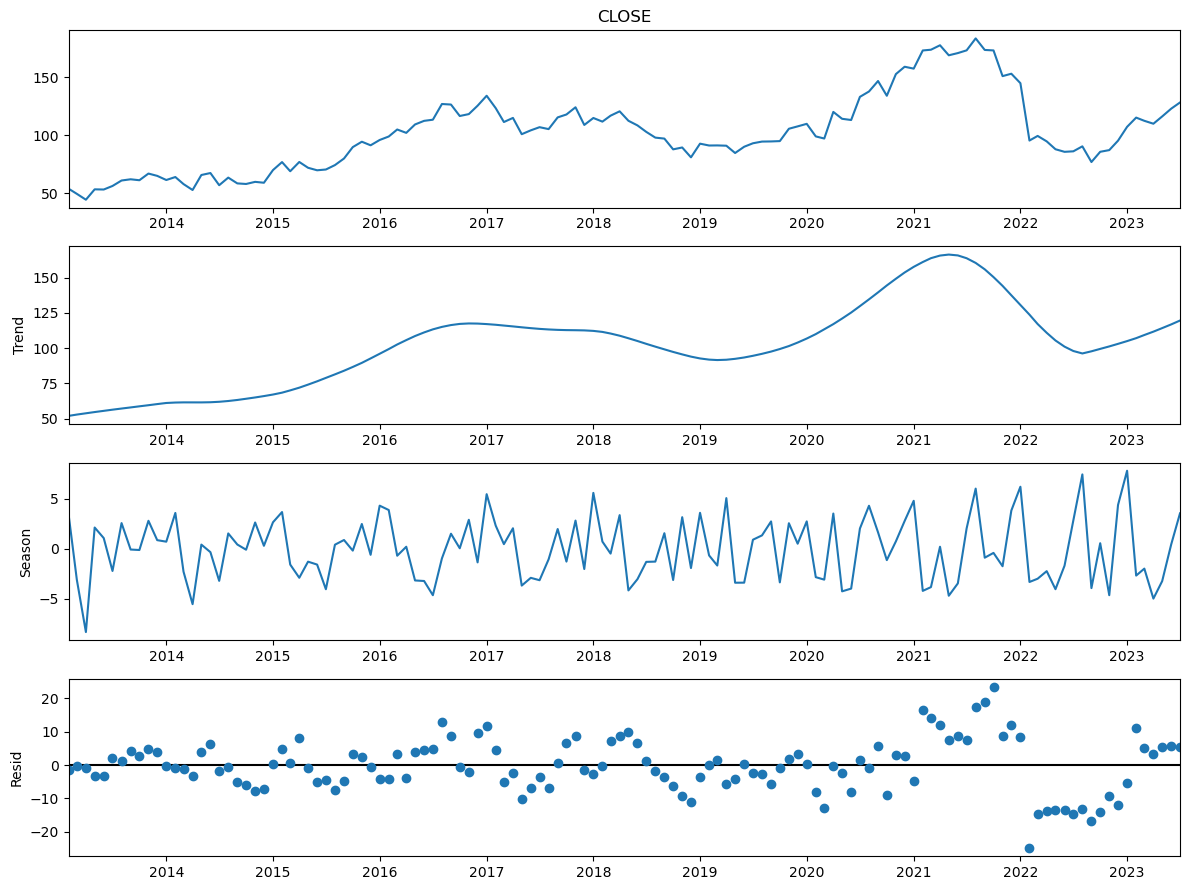

In [93]:
#STL -Decomposition
result = STL(series).fit()
chart = result.plot()
plt.show()